<a href="https://colab.research.google.com/github/wel51x/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/My_U2S2_OLS_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

## What is Linear Regression?

Linear Regression is a statistical model that seeks to describe the relationship between some y variable and one or more x variables. 

![Linear Regression](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)

In the simplest case, linear regression seeks to fit a straight line through a cloud of points. This line is referred to as the "regression line" or "line of best fit." This line tries to summarize the relationship between our X and Y in a way that enables us to use the equation for that line to make predictions.

### Synonyms for "y variable" 

- Dependent Variable
- Response Variable
- Outcome Variable 
- Predicted Variable
- Measured Variable
- Explained Variable
- Label

I'll try to stick to calling our y variable our "dependent" or "predicted" variable I think that make the most sense for us since we're seeing to use Linear Regression as a predictive model. 

### Synonyms for "x variable(s)"

- Indepent Variable
- Explanatory Variable
- Regressor
- Covariate

I'll try to stick to "explanatory variable" or "independent variable" - or just "x variable." All of these different terms just highlight a slightly different nuance of the roles these variables play. 

[Wikipedia Independent and Dependent Variables](https://en.wikipedia.org/wiki/Dependent_and_independent_variables)

# Simple Linear Regresion (bivariate)

## Making Predictions

Say that we were trying to create a model that captured the relationship between temperature outside and ice cream sales. In Machine Learning our goal is often different that of other flavors of Linear Regression Analysis, because we're trying to fit a model to this data with the intention of making **predictions** on new data (in the future) that we don't have yet.

## What are we trying to predict?

So if we had measured ice cream sales and the temprature outside on 11 different days, at the end of our modeling **what would be the thing that we would want to predict? - Ice Cream Sales or Temperature?**

We would probably want to be measuring temperature with the intention of using that to **forecast** ice cream sales. If we were able to successfully forecast ice cream sales from temperature, this might help us know beforehand how much ice cream to make or how many cones to buy or on which days to open our store, etc. Being able to make predictions accurately has a lot of business implications. This is why making accurate predictions is so valuable (And in large part is why data scientists are paid so well).

### Y Variable Intuition

We want the thing that we're trying to predict to serve as our **y** variable. This is why it's sometimes called the "predicted variable." We call it the "dependent" variable because our prediction for how much ice cream we're going to sell "depends" on the temperature outside. 

### X Variable Intuition

All other variables that we use to predict our y variable (we're going to start off just using one) we call our **x** variables. These are called our "independent" variables because they don't *depend* on y, they "explain" y. Hence they are also referred to as our "explanatory" variables.

# Code Example using Scikit-Learn

In [0]:
# Linear Regression Example

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ice_Cream_Sales.csv')

print(df.shape)
df.head(11)

(11, 2)


,Farenheit,Dollars
0,32,200
1,35,400
2,47,500
3,55,600
4,73,1100
5,78,1200
6,81,1500
7,86,1700
8,89,1800
9,90,1600


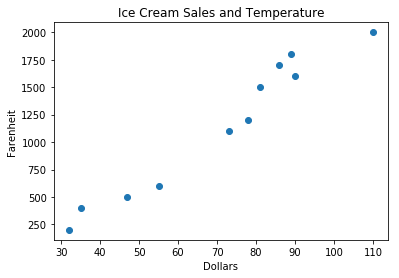

In [0]:
plt.scatter(df.Farenheit, df.Dollars)
plt.ylabel("Farenheit")
plt.xlabel("Dollars")
plt.title("Ice Cream Sales and Temperature")
plt.show()

We can see from the scatterplot that these data points seem to follow a somewhat linear relationship. This means that we could probably summarize their relationship well by fitting a line of best fit to these points. Lets do it.


## The Equation for a Line

As we know a common equation for a line is:

\begin{align}
y = mx + b
\end{align}

Where $m$ is the slope of our line and $b$ is the y-intercept. 

If we want to plot a line through our cloud of points we figure out what these two values should be. Linear Regression seeks to **estimate** the slope and intercept values that describe a line that best fits the data points.

## Estimating Coefficients using Scikit-Learn

Before we can pass our x and y values into Scikit-Learn we need our data to be the right shape. So we'll split them off into their own numpy arrays and make sure that they have the right dimensions before we pass them to sklearn. Making sure that your data is in the right shape for a particular function or algorithm to work with it is a constant pain point in data science, so you'll learn to rely on the documentation to learn what the function expects to receive.

<https://stackoverflow.com/questions/29934083/linear-regression-on-pandas-dataframe-using-sci-kit-learn>

In [0]:
import numpy as np

# Remember the convention of using a capital X for our x values and a lowercase y? 
# This is because typically we will have more than one x variable
# and our X dataframe will be a matrix rather than a vector.

X = df['Farenheit'].values[:, np.newaxis]
y = df['Dollars'].values

# Our data needs to have this shape to be accepted by sklearn
print(X.shape)
print(y.shape)

(11, 1)
(11,)


In [0]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print("Slope Coefficient: ", model.coef_[0])
print("\nIntercept Value: ", model.intercept_)

Slope Coefficient:  24.68849397414572

Intercept Value:  -596.20648399428


Now we can use these estimated values to plot our line of best fit.

When we write "predicted values" in statistics we denote them by putting a caret symbol or "hat" over them to distinguish them from the variables representing our measured data. 

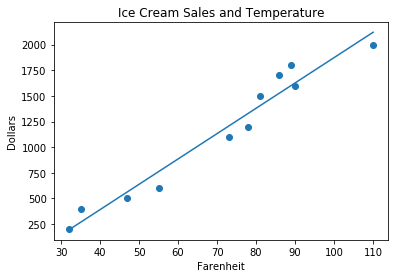

In [0]:
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df.Farenheit, df.Dollars)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)

# Graph axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Ice Cream Sales and Temperature")
plt.show()

## Making Predictions

Now that we have established a line of best fit that summarizes the relationship that we see in the data, we can use the line of best fit in order to make predictions. How do we make predictions? We plug x values into our equation and see what the predicted y value is.

Suppose that the weather forecast said that the temperature outside tomorrow was going to be 70 degrees Farenheit. What would we predict that our ice cream sales would be?

In [0]:
print(m_hat, b_hat, m_hat*70 + b_hat)

24.68849397414572 -596.20648399428 1131.9880941959204


Predictions based on the original temps: [array([193.82532318]), array([267.8908051]), array([564.15273279]), array([761.66068458]), array([1206.05357612]), array([1329.49604599]), array([1403.56152791]), array([1527.00399778]), array([1601.0694797]), array([1625.75797368]), array([2119.52785316])]


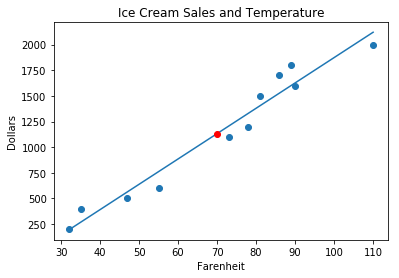

In [0]:
# Make a single prediction for 70 degrees farenheit
x_value = 70

# Plug our temperature into our equation (model)
prediction = m_hat*x_value + b_hat
print("Predictions based on the original temps:", y_hat)

# Plot the points
plt.scatter(df.Farenheit, df.Dollars)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)
plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("Dollars")
plt.xlabel("Farenheit")
plt.title("Ice Cream Sales and Temperature")
plt.show()

## Predicted Values

You'll notice that our predicted point (red) lies on our line of best fit. The line of best fit represents all of the possible predictions that we could make given some x value. Points that represent our predictions that lie on the line of best fit are called "predicted values" or "fitted values."

## Residual Error 

The residual error is the distance between points in our dataset and our regression line. How would we calculate this? Well what if we made a prediction for an x value that we already had in our dataset? Lets make a prediction for 55 degrees Farenheit.

Predictions based on the original temps: [array([193.82532318]), array([267.8908051]), array([564.15273279]), array([761.66068458]), array([1206.05357612]), array([1329.49604599]), array([1403.56152791]), array([1527.00399778]), array([1601.0694797]), array([1625.75797368]), array([2119.52785316])]


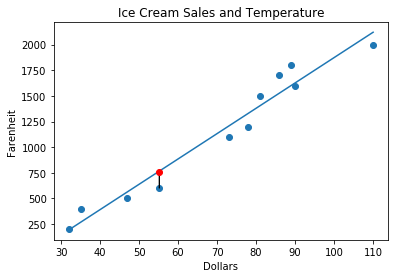

In [0]:
# Make a single prediction for 70 degrees farenheit
x_value = 55

prediction = m_hat*x_value + b_hat
print("Predictions based on the original temps:", y_hat)

# b_hat == regression.intercept_

# Plot the points
plt.scatter(df.Farenheit, df.Dollars)

# Plot the line
y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, y_hat)
plt.plot(x_value, prediction, 'ro')

# Graph axes and title
plt.ylabel("Farenheit")
plt.xlabel("Dollars")
plt.title("Ice Cream Sales and Temperature")

# Plot the error
plt.arrow(55.2, 600, 0, 150, color='black')
plt.show()

See how we have both a predicted point and a measured point (from the data we collected) where x=55? The difference between these two points (or the distance betwen them) is what is called the ** residual error** - Sometimes just called the "residual". Some amount of error is unavoidable when making predictions, but we want our line of best fit to minimize this error (make it as small as possible). That's what makes it the line of best fit. 

# The Anatomy of Linear Regression

- Intercept: The $b$ value in our line equation $y=mx+b$
- Slope: The $m$ value in our line equation $y=mx+b$. These two values together define our regression line.

![Slope and Intercept](http://www.ryanleeallred.com/wp-content/uploads/2018/08/linear-regression-diagram.png)

- $\hat{y}$ : A prediction
- Line of Best Fit (Regression Line)
- Predicted (fitted) Values: Points on our regression line
- Observed Values: Points from our dataset
- Error: The distance between predicted and observed values.

![Residual Error](http://www.ryanleeallred.com/wp-content/uploads/2018/08/residual-or-error.gif)


# More Formal Notation

![Simple Linear Regression](http://www.ryanleeallred.com/wp-content/uploads/2018/08/simple-regression-formula.png)

We have talked about a line of regression being represented like a regular line $y=mx+b$ but as we get to more complicated versions we're going to need to extend this equation. So lets establish the proper terminology.

**X** - Independent variable, predictor variable, explanatory variable, regressor, covariate

**Y** - Response variable, predicted variable, measured vairable, explained variable, outcome variable, dependent variable

$\beta_0$ - "Beta Naught" or "Beta Zero", the intercept value. This is how much of y would exist if X were zero. This is sometimes represented by the letter "a" but I hate that. So it's "Beta 0" during my lecture.

$\beta_1$ - "Beta One" The primary coefficient of interest. This values is the slope of the line that is estimated by "minimizing the sum of the squared errors/residuals" - We'll get to that. 

$\epsilon$ - "Epsilon" The "error term", random noise, things outside of our model that affect y.

# How Does it do it?

## Minimizing the Sum of the Squared Error

The most common method of estimating our $\beta$ parameters  is what's known as "Ordinary Least Squares" (OLS). (There are different methods of arriving at a line of best fit). OLS estimates the parameters that minimize the squared distance between each point in our dataset and our line of best fit. 

\begin{align}
SSE = \sum(y_i - \hat{y})^2
\end{align}

## Linear Algebra!

The same result that is found by minimizing the sum of the squared errors can be also found through a linear algebra process known as the "Least Squares Solution:"

![OLS Regression](http://www.ryanleeallred.com/wp-content/uploads/2018/08/OLS-linear-algebra.png)

Before we can work with this equation in its linear algebra form we have to understand how to set up the matrices that are involved in this equation. 

### $y$ Vector

The $y$ vector is simple in that it's just a vector of all of our measured y values from our dataset. 

### The $X$ Matrix

The $X$ matrix is a little bit more complicated since it needs to contain values that can be used to find both our slope and our intercept values. All that this means is that we have to add an extra column of 1s in addition to our regular columns of X values. Without this we wouldn't be able to computer our intercept value.

### The $\beta$ vector

The $\beta$ vector represents all the parameters that we are trying to estimate, our $y$ vector and $X$ matrix values are full of data from our dataset. The $\beta$ vector holds the variables that we are solving for: $\beta_0$ and $\beta_1$

Now that we have all of the necessary parts we can set them up in the following equation:

\begin{align}
y = X \beta + \epsilon
\end{align}

Since our $\epsilon$ value represents **random** error we can assume that it will equal zero on average.

\begin{align}
y = X \beta
\end{align}

The objective now is to isolate the $\beta$ matrix. We can do this by pre-multiplying both sides by "X transpose" $X^{T}$.

\begin{align}
X^{T}y =  X^{T}X \beta
\end{align}

Since anything times its transpose will result in a square matrix, if that matrix is then an invertible matrix, then we should be able to multiply both sides by its inverse to remove it from the right hand side. (We'll talk tomorrow about situations that could lead to $X^{T}X$ not being invertible.)

\begin{align}
(X^{T}X)^{-1}X^{T}y =  (X^{T}X)^{-1}X^{T}X \beta
\end{align}

Since any matrix multiplied by its inverse results in the identity matrix, and anything multiplied by the identity matrix is itself, we are left with only $\beta$ on the right hand side:

\begin{align}
(X^{T}X)^{-1}X^{T}y = \hat{\beta}
\end{align}

We will now call it "beta hat" $\hat{\beta}$ because it now represents our estimated values for $\beta_0$ and $\beta_1$

# Lets calculate our $\beta$ coefficients with numpy!

In [0]:
df['Ones'] = np.ones(11)

## Get our X matrix and y vector in the correct shape
X = df[['Ones', 'Farenheit']].as_matrix()
Y = df['Dollars'].as_matrix().reshape(-1, 1)

print("X: \n", X)

X_transpose = X.T

print("\nX Transpose: \n", X_transpose)

X_transpose_X = np.matmul(X_transpose, X)

print("\n X Transpose X \n", X_transpose_X)

X_transpose_X_inverse = np.linalg.inv(X_transpose_X)

print("\n X Transpose X Inverse \n", X_transpose_X_inverse)

X_transpose_Y = np.matmul(X_transpose, Y)

print("\n X Transpose Y \n", X_transpose_Y)

beta_hat = np.matmul(X_transpose_X_inverse, X_transpose_Y)

print("\n Beta Hat \n", beta_hat)

X: 
 [[  1.  32.]
 [  1.  35.]
 [  1.  47.]
 [  1.  55.]
 [  1.  73.]
 [  1.  78.]
 [  1.  81.]
 [  1.  86.]
 [  1.  89.]
 [  1.  90.]
 [  1. 110.]]

X Transpose: 
 [[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
 [ 32.  35.  47.  55.  73.  78.  81.  86.  89.  90. 110.]]

 X Transpose X 
 [[1.1000e+01 7.7600e+02]
 [7.7600e+02 6.0974e+04]]

 X Transpose X Inverse 
 [[ 8.89637865e-01 -1.13221862e-02]
 [-1.13221862e-02  1.60494908e-04]]

 X Transpose Y 
 [[  12600.]
 [1042700.]]

 Beta Hat 
 [[-596.20648399]
 [  24.68849397]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


# Multiple Regression

Simple or bivariate linear regression involves a single $x$ variable and a single $y$ variable. However, we can have many $x$ variables. A linear regression model that involves multiple x variables is known as **Multiple** Regression - NOT MULTIVARIATE!

![Multiple Regression](http://www.ryanleeallred.com/wp-content/uploads/2018/08/multiple-regression-model.png)

## Question

Simple linear regression uses an $X$ matrix with two colums (a column of ones for the intercept and a column of x values from our data). This achieves the result of plotting a line through a cloud of points. What if we had two $x$ features (also known as "dimensions")?

## Lets try and see!

In this example we will try to predict **systolic blood** pressure from **age** and **weight**

$y$ = systolic blood pressure

$age$ = age in years

$weight$ = weight in pounds

$y_i = \beta_0 + \beta_1age_i + \beta_2weight_i + \epsilon $

In [0]:
import pandas as pd

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
df = df.rename(index=str, columns={"X1": "y", "X2": "age", "X3": "weight"})
print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(11, 3)


,y,age,weight
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


In [0]:
from sklearn.linear_model import LinearRegression

# The Scikit-Learn code is the same every time.
y = df.loc[:, ['y']].values
X = df.loc[:, ['age','weight']].values

print(y.shape)
print(X.shape)

model = LinearRegression()
model.fit(X, y)

beta_0 = model.intercept_
beta_i = model.coef_[0]

print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

(11, 1)
(11, 2)
Slope Coefficients:  [0.86141469 0.3348592 ]

Intercept Value:  [30.99410295]


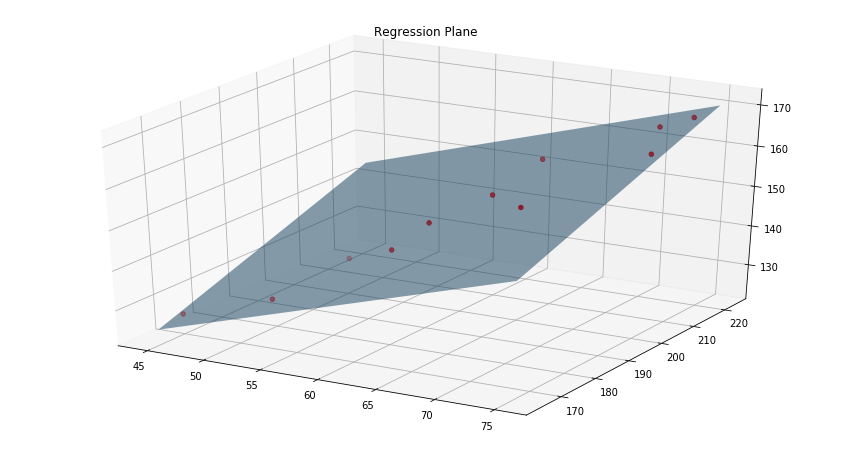

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['age'], df['weight'], df['y'],c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

# Dimensionality in Linear Regression!

Muliple Regression is simply an extension of the bivariate case. The reason why we see the bivariate case demonstrated so often is simply because it's easier to graph and all of the intuition from the bivariate case is the same as we keep on adding explanatory variables.

As we increase the number of $x$ values in our model we are simply fitting a n-1-dimensional plane to an n-dimensional cloud of points within an n-dimensional hypercube. 

# Interpreting Coefficients

One of Linear Regression's strengths is that the parameters of the model (coefficients) are readily interpretable and useful. Not only do they describe the relationship between x and y but they put a number on just how much x is associated with y. We should be careful to not speak about this relationshiop in terms of causality because these coefficients are in fact correlative measures. We would need a host of additional techniques in order to estimate a causal effect using linear regression (econometrics).

\begin{align}
\hat{\beta} = \frac{Cov(x,y)}{Var(y)}
\end{align}

Going back to the two equations for the two models that we have estimated so far, lets replace their beta values with their actual values to see if we can make sense of how to interpret these beta coefficients.

## Bivariate Model

$y_i = \beta_0 + \beta_1temperature + \epsilon$

$sales_i = -596.2 + 24.69temperature + \epsilon$

What might $\beta_0$ in this model represent? It represents the level of sales that we would have if temperature were 0. Since this is negative one way of interpreting it is that it's so cold outside that you would have to pay people to eat ice cream. A more appropriate interpretation is probably that the ice cream store owner should close his store down long before the temperature reaches 0 degrees farenheit (-17.7 celsius). The owner can compare his predicted sales with his costs of doing business to know how warm the weather has to get before he should open his store.

What might the $beta_1$ in this model reprsent? it represents the increase in sales for each degree of temperature increase. For every degree that the temperature goes up outside he has $25 more in sales.

## Multiple Regression Model

$y_i = \beta_0 + \beta_1age_i + \beta_2weight_i + \epsilon$

$BloodPressure_i = 30.99+ .86age_i + .33weight_i + \epsilon$

The interpretation of coefficients in this example are similar. The intercept value repesents the blood pressure a person would have if they were 0 years old and weighed 0 pounds. This not a super useful interpretation. If we look at our data it is unlikely that we have any measurements like these in the dataset. This means that our interpretation of our intercept likely comes from extrapolating the regression line (plane). Coefficients having straightforward interpretations is a strength of linear regression if we're careful about extrapolation and only interpreting our data within the context that it was gathered.

The interpretation of our other coefficients can be a useful indicator for how much a person similar to those in our dataset's blood pressure will go up on average with each additional year of age and pound of weight.

# R Squared:  $R^2$

One final attribute of linear regressions that we're going to talk about today is a measure of goodness of fit known as $R^2$ or R-squared. $R^2$ is a statistical measure of how close the data are fitted to our regression line. A helpful interpretation for the $R^2$ is the percentage of the dependent variable that is explained by the model.

In other words, the $R^2$ is the percentage of y that is explained by the x variables included in the model. For this reason the $R^2$ is also known as the "coefficient of determination," because it explains how much of y is explained (or determined) by our x varaibles. We won't go into the calculation of $R^2$ today, just know that a higher $R^2$ percentage is nearly always better and indicates a model that fits the data more closely. 

# Basic Model Validation

One of the downsides of relying on $R^2$ too much is that although it tells you when you're fitting the data well, it doesn't tell you when you're *overfitting* the data. The best way to tell if you're overfitting the data is to get some data that your model hasn't seen yet, and evaluate how your predictions do. This is essentially what "model validation" is.

## ==>> Steps of Basic Model Validation <<==

1) Split your labeled data into two halves.

2) Fit your linear regression model to one of the two halves (or 80-20 or some such). (We call these the training and test datasets, respectively)

3) Run the second half of your data through your model and make predictions. (On the test dataset)

4) Compare your predictions with the true values via some measure of "accuracy." (Root Mean Squared Error)

# An Example using the Boston Housing Dataset

In [0]:
# http://lib.stat.cmu.edu/datasets/boston

import pandas as pd
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

print(boston.shape)
boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
'''Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's'''

# Our target variable is MEDV
# MEDV: Median value of owner-occupied homes in $1000s

"Variables in order:\n CRIM     per capita crime rate by town\n ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n INDUS    proportion of non-retail business acres per town\n CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n NOX      nitric oxides concentration (parts per 10 million)\n RM       average number of rooms per dwelling\n AGE      proportion of owner-occupied units built prior to 1940\n DIS      weighted distances to five Boston employment centres\n RAD      index of accessibility to radial highways\n TAX      full-value property-tax rate per $10,000\n PTRATIO  pupil-teacher ratio by town\n B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\n LSTAT    % lower status of the population\n MEDV     Median value of owner-occupied homes in $1000's"

**Pair plot**

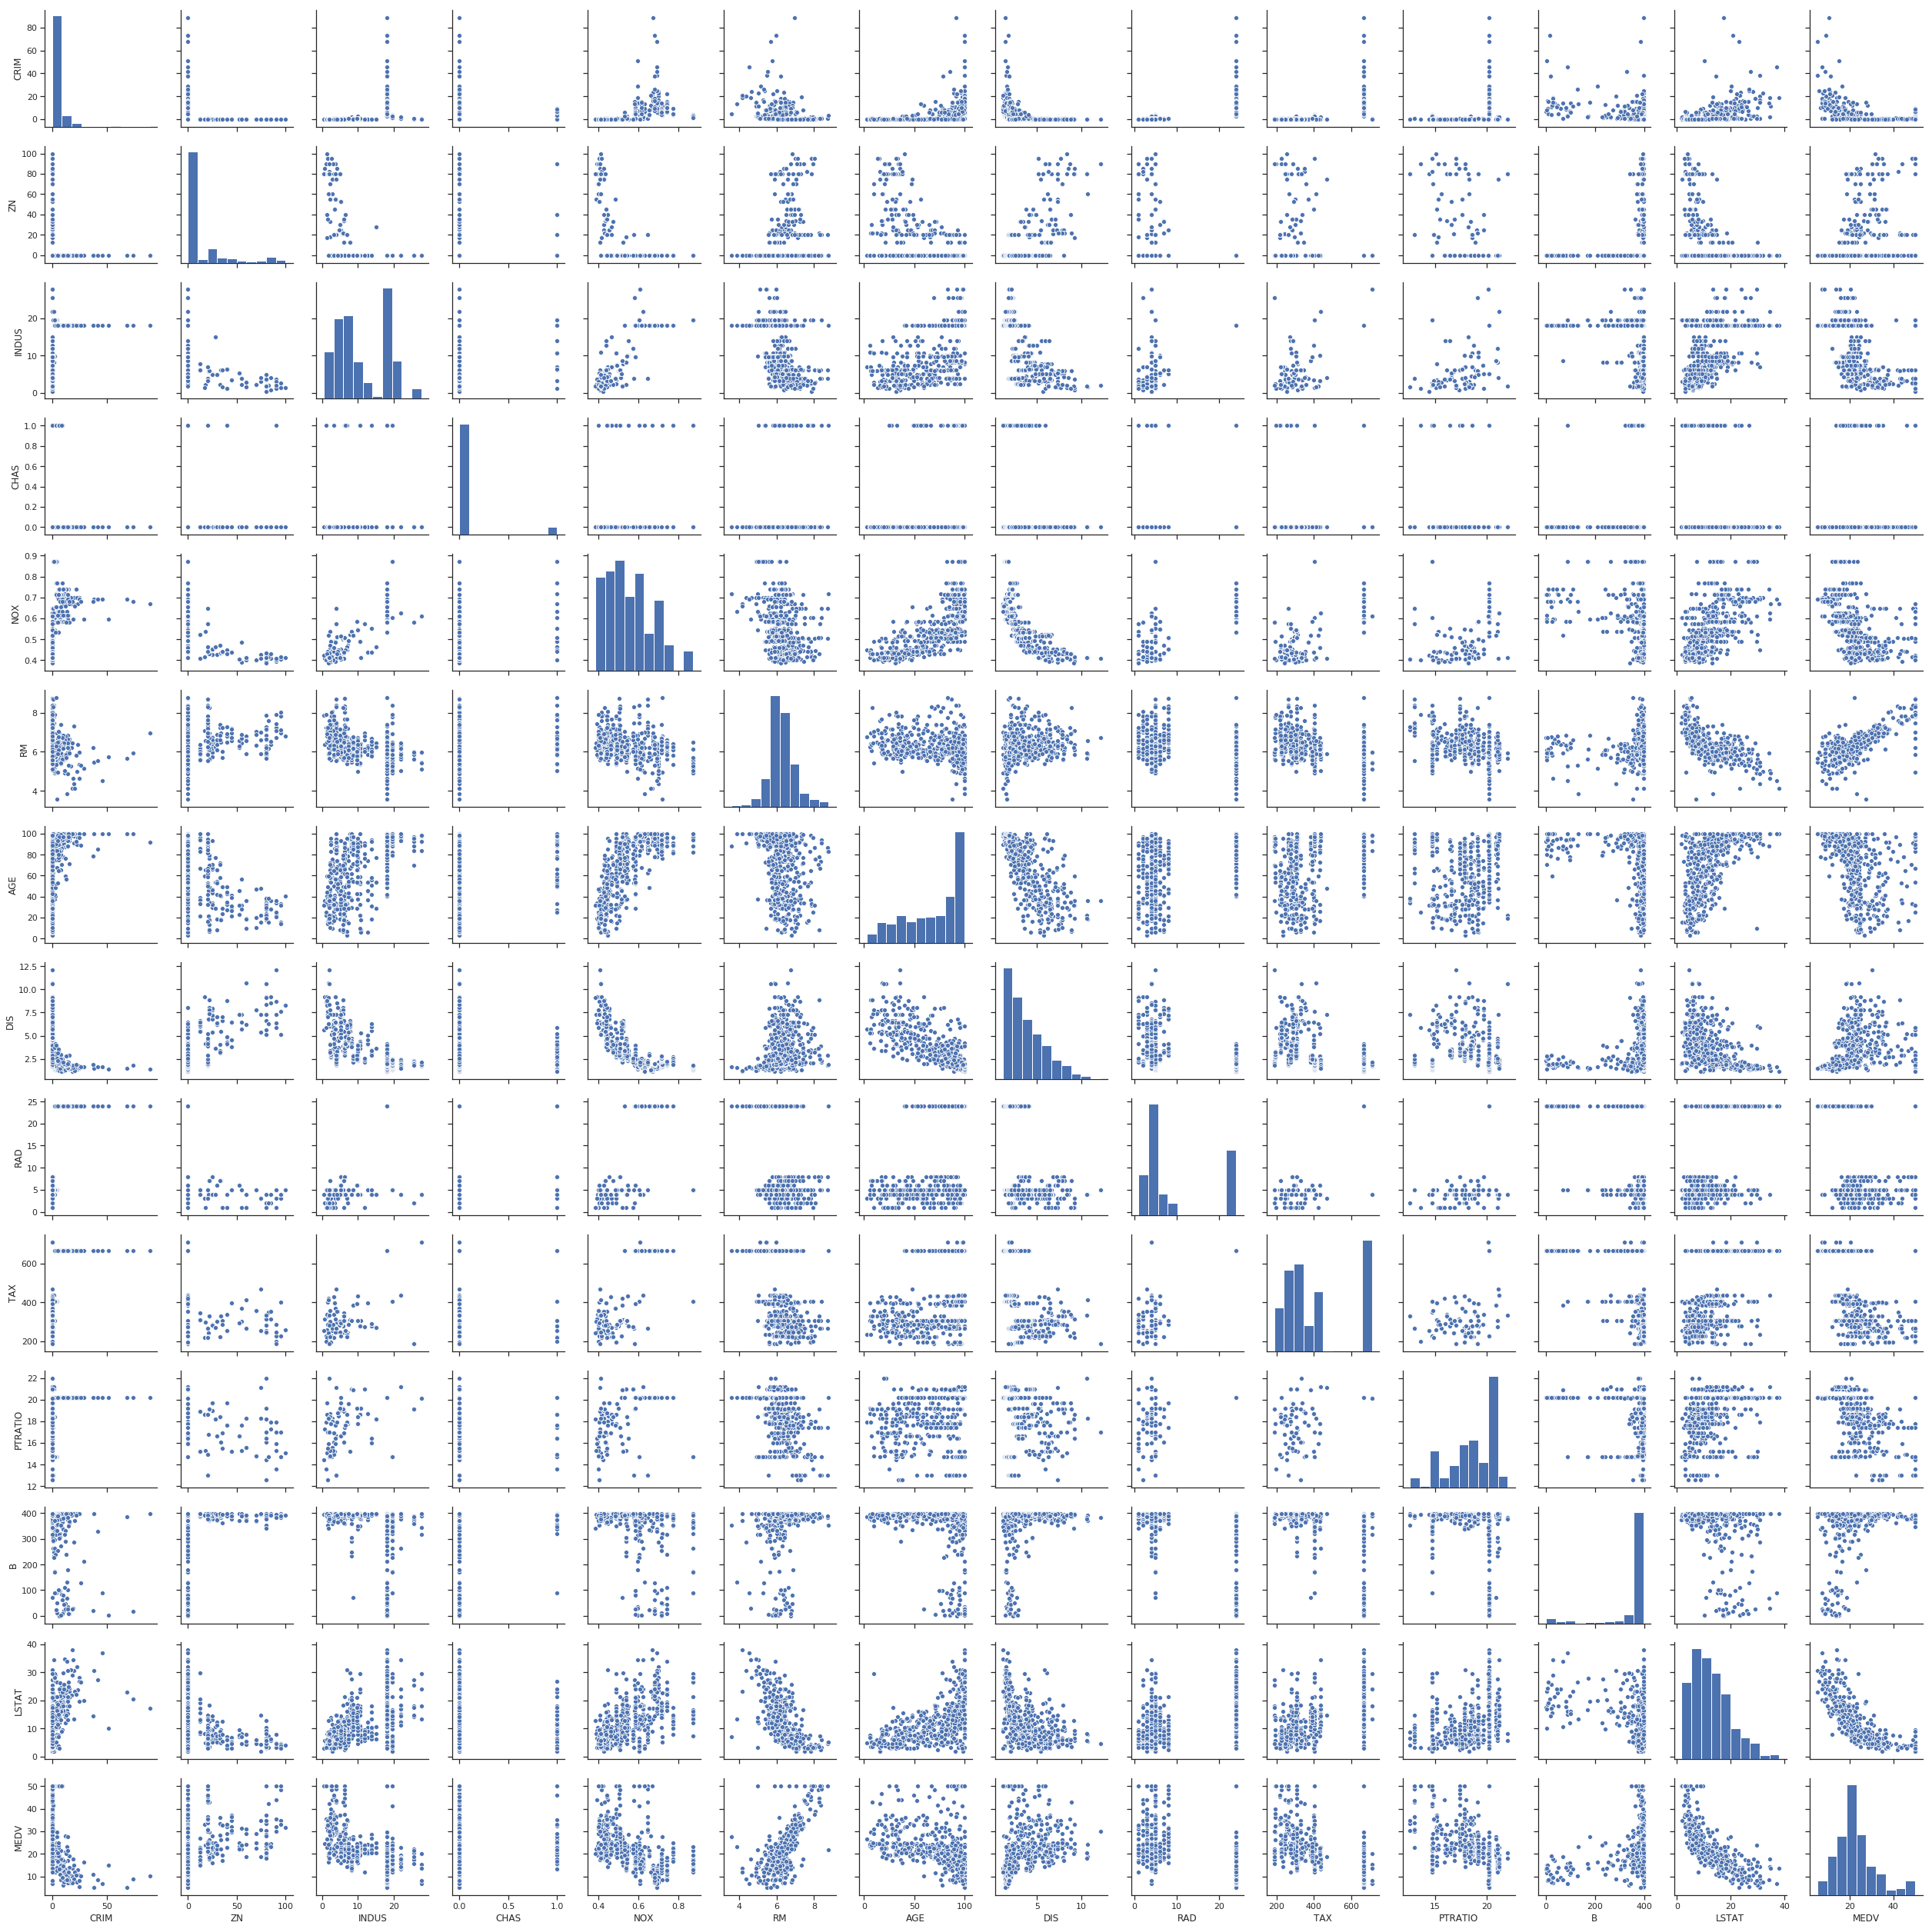

In [0]:
import seaborn as sns

sns.set(style='ticks', color_codes=True)

graph = sns.pairplot(boston)

**split 50-50**

In [0]:
from sklearn.model_selection import train_test_split

y = boston['MEDV']
X = boston.drop(["MEDV","RM"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(506, 12) 

(253, 12)
(253, 12)
(253,)
(253,)


,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
475,6.39312,0.0,18.10,0.0,0.584,97.4,2.2060,24.0,666.0,20.2,302.76,24.10
299,0.05561,70.0,2.24,0.0,0.400,10.0,7.8278,5.0,358.0,14.8,371.58,4.74
296,0.05372,0.0,13.92,0.0,0.437,51.0,5.9604,4.0,289.0,16.0,392.85,7.39
198,0.03768,80.0,1.52,0.0,0.404,38.3,7.3090,2.0,329.0,12.6,392.20,6.62
377,9.82349,0.0,18.10,0.0,0.671,98.8,1.3580,24.0,666.0,20.2,396.90,21.24


In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-1.27923747e-01  5.48963563e-02 -7.24883728e-02  4.40099873e+00
 -1.67774323e+01  6.49043336e-03 -1.79352010e+00  3.29457783e-01
 -1.17801703e-02 -1.04685159e+00  9.37137105e-03 -7.85671412e-01]

 Intercept:  66.17595666871549


In [0]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 26.961353800746288
RMSE is 5.192432358803173
R^2 is 0.6676782213285923


**split 80-20**

In [0]:
from sklearn.model_selection import train_test_split

y = boston['MEDV']
X = boston.drop(["MEDV","RM"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

print(X.shape, "\n")

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

X_train.head()

(506, 12) 

(404, 12)
(102, 12)
(404,)
(102,)


,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [0]:
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-1.26080851e-01  4.82212226e-02 -4.58972217e-02  3.18980590e+00
 -2.03390414e+01  2.24445061e-02 -1.71610538e+00  3.92983355e-01
 -1.39806144e-02 -1.15090949e+00  9.43447025e-03 -7.92425873e-01]

 Intercept:  68.84845455559012


In [0]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 22.13324688818983
RMSE is 4.704598483206599
R^2 is 0.6981848483146993


# Why is Linear Regression so Important?

## Popularity 

Linear Regression is an extremely popular technique that every data scientist **needs** to understand. It's not the most advanced technique and there are supervised learning techniques that will obtain a higher accuracy, but where it lacks in accuracy it makes up for it in interpretability and simplicity.

## Interpretability

Few other models possess coefficients that are so directly linked to their variables with a such a clear interpretation. Tomorrow we're going to learn about ways to make them even easier to interpret.

## Simplicity

A linear regression model can be communicated just by writing out its equation. It's kind of incredible that such high dimensional relationships can be described from just a linear combination of variables and coefficients. 





Is Linear Regression Supervised or Unsupervised learning?

Is Linear Regression a Classification or Regression algorithm?